## Monthly Exam – Applied AI & Data Science

### Case Study: Predicting Tesla Stock Price Movements

---


You have recently been hired as a Data Scientist at a financial consultancy firm. Your manager has assigned you
the task of analyzing Tesla’s stock market data (2010–2020) to help investors make better trading decisions.
The firm expects you to:
1. Explore the dataset and identify patterns.
2. Build predictive models to forecast stock prices.
Your results will directly contribute to the company’s investment strategy.

Dataset Link: Tesla Stock Data (2010–2020) – Kaggle

Dataset Description
The dataset contains daily stock trading information for Tesla, including:
- Date – Trading day
- Open – Price at market opening
- High – Highest price during the day
- Low – Lowest price during the day
- Close – Price at market closing
- Adj Close – Adjusted closing price
- Volume – Total number of shares traded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/TSLA.csv')
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


## Section A – Exploratory Data Analysis (30 Marks, ~30 minutes)
1. Show the trend of Closing Price over the years. (5 marks)
2. Find and visualize the correlation between Open, High, Low, and Close. (5 marks)
3. Identify the highest and lowest trading volume days and discuss what it might mean for investors. (5 marks)
4. Plot the distribution of Closing Prices. (5 marks)
5. Report any missing values or anomalies and suggest how to handle them. (10 marks)

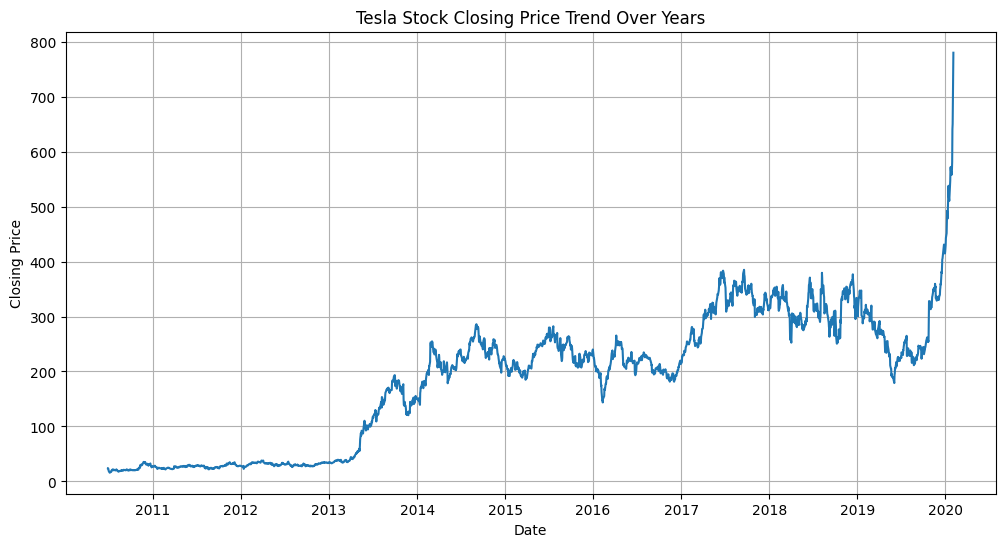

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Tesla Stock Closing Price Trend Over Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

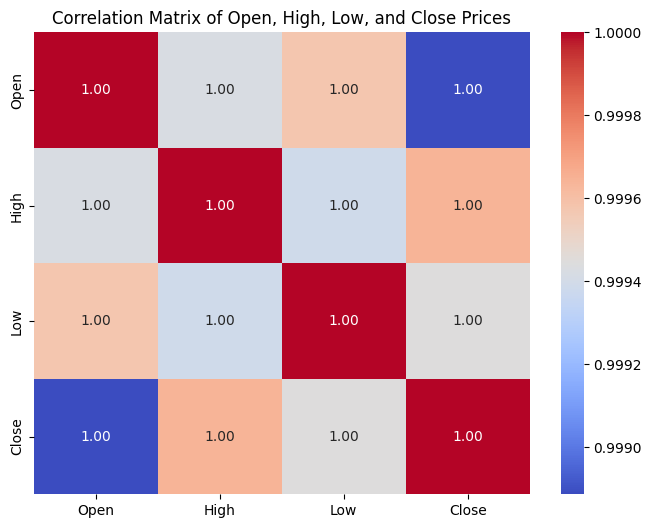

In [13]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Open, High, Low, and Close Prices')
plt.show()

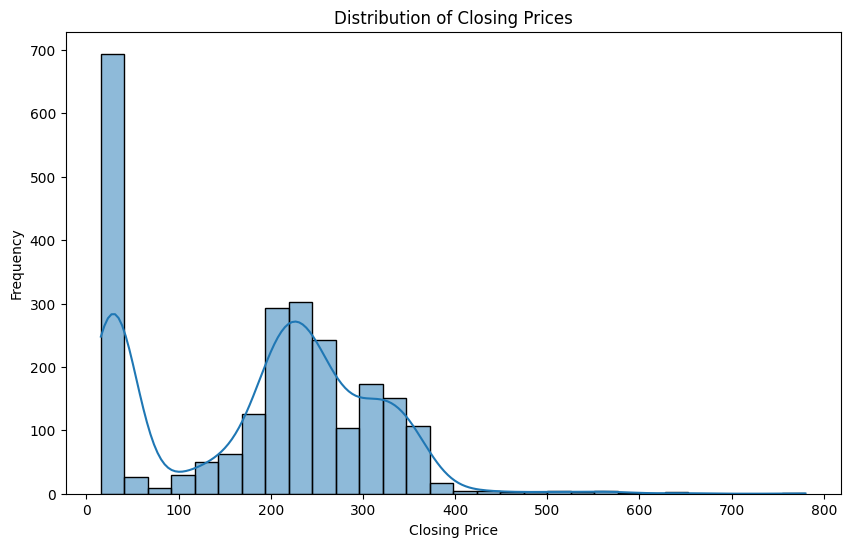

In [17]:
closing_price = df['Close']
plt.figure(figsize=(10, 6))
sns.histplot(closing_price, bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values)
print("There are no missing values in the dataset")

Missing values per column:


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


There are no missing values in the dataset


## **Section** B – Linear Regression (25 Marks, ~25 minutes)
1. Build a Linear Regression model using Open, High, Low, and Volume as predictors. (10 marks)
2. Evaluate the model using MAE, RMSE, and R² score. (10 marks)
3. Explain which feature contributes the most to predicting the Closing Price. (5 marks)

In [20]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1.34
Root Mean Squared Error (RMSE): 2.09
R-squared (R²): 1.00


In [25]:
coefficients = linear_model.coef_
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
display(feature_importance)

,Feature,Coefficient
0,Open,-6.450218e-01
1,High,9.221136e-01
2,Low,7.215048e-01
3,Volume,-3.534292e-08


In [26]:
print("Interpretation of Coefficients:")
print(f"- A 1-unit increase in 'High' is associated with a {feature_importance[feature_importance['Feature'] == 'High']['Coefficient'].values[0]:.2f}-unit increase in the predicted Closing Price, holding other features constant.")
print(f"- A 1-unit increase in 'Low' is associated with a {feature_importance[feature_importance['Feature'] == 'Low']['Coefficient'].values[0]:.2f}-unit increase in the predicted Closing Price, holding other features constant.")
print(f"- A 1-unit increase in 'Open' is associated with a {feature_importance[feature_importance['Feature'] == 'Open']['Coefficient'].values[0]:.2f}-unit change in the predicted Closing Price, holding other features constant.")
print(f"- 'Volume' has a very small coefficient ({feature_importance[feature_importance['Feature'] == 'Volume']['Coefficient'].values[0]:.2e}), indicating a negligible linear relationship with the Closing Price in this model.")

most_influential_feature = feature_importance.loc[feature_importance['Coefficient'].abs().idxmax()]
print(f"\nThe feature that contributes the most to predicting the Closing Price is '{most_influential_feature['Feature']}' with a coefficient of {most_influential_feature['Coefficient']:.2f}.")

Interpretation of Coefficients:
- A 1-unit increase in 'High' is associated with a 0.92-unit increase in the predicted Closing Price, holding other features constant.
- A 1-unit increase in 'Low' is associated with a 0.72-unit increase in the predicted Closing Price, holding other features constant.
- A 1-unit increase in 'Open' is associated with a -0.65-unit change in the predicted Closing Price, holding other features constant.
- 'Volume' has a very small coefficient (-3.53e-08), indicating a negligible linear relationship with the Closing Price in this model.

The feature that contributes the most to predicting the Closing Price is 'High' with a coefficient of 0.92.


In [27]:
print("Linear Regression Model Performance Evaluation:")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Interpretation: On average, the model's predictions are off by approximately ${mae:.2f}.")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  Interpretation: The standard deviation of the prediction errors is approximately ${rmse:.2f}. This metric is more sensitive to large errors than MAE.")
print(f"- R-squared (R²): {r2:.2f}")
print(f"  Interpretation: Approximately {r2*100:.0f}% of the variance in the Closing Price can be explained by the features in this model.")

print("\nFeature Importance (Based on Model Coefficients):")
display(feature_importance)
print("\nInterpretation of Feature Contributions:")
print(f"- 'High' has the largest positive coefficient ({feature_importance[feature_importance['Feature'] == 'High']['Coefficient'].values[0]:.2f}), indicating that higher daily prices are strongly associated with higher closing prices.")
print(f"- 'Low' also has a significant positive coefficient ({feature_importance[feature_importance['Feature'] == 'Low']['Coefficient'].values[0]:.2f}), suggesting that higher daily lows are related to higher closing prices.")
print(f"- 'Open' has a negative coefficient ({feature_importance[feature_importance['Feature'] == 'Open']['Coefficient'].values[0]:.2f}). This might seem counterintuitive, but in the context of the other highly correlated price features (High and Low), it suggests that for a given High and Low, a lower opening price might lead to a higher closing price relative to the open.")
print(f"- 'Volume' has a very small coefficient ({feature_importance[feature_importance['Feature'] == 'Volume']['Coefficient'].values[0]:.2e}), indicating that the trading volume has a negligible linear impact on the predicted Closing Price in this model, especially when considering the daily price range (Open, High, Low).")
print(f"\nThe feature that contributes the most to predicting the Closing Price is '{most_influential_feature['Feature']}' based on the magnitude of its coefficient.")

Linear Regression Model Performance Evaluation:
- Mean Absolute Error (MAE): 1.34
  Interpretation: On average, the model's predictions are off by approximately $1.34.
- Root Mean Squared Error (RMSE): 2.09
  Interpretation: The standard deviation of the prediction errors is approximately $2.09. This metric is more sensitive to large errors than MAE.
- R-squared (R²): 1.00
  Interpretation: Approximately 100% of the variance in the Closing Price can be explained by the features in this model.

Feature Importance (Based on Model Coefficients):


,Feature,Coefficient
0,Open,-6.450218e-01
1,High,9.221136e-01
2,Low,7.215048e-01
3,Volume,-3.534292e-08



Interpretation of Feature Contributions:
- 'High' has the largest positive coefficient (0.92), indicating that higher daily prices are strongly associated with higher closing prices.
- 'Low' also has a significant positive coefficient (0.72), suggesting that higher daily lows are related to higher closing prices.
- 'Open' has a negative coefficient (-0.65). This might seem counterintuitive, but in the context of the other highly correlated price features (High and Low), it suggests that for a given High and Low, a lower opening price might lead to a higher closing price relative to the open.
- 'Volume' has a very small coefficient (-3.53e-08), indicating that the trading volume has a negligible linear impact on the predicted Closing Price in this model, especially when considering the daily price range (Open, High, Low).

The feature that contributes the most to predicting the Closing Price is 'High' based on the magnitude of its coefficient.


## Summary:

### Data Analysis Key Findings

*   The Linear Regression model achieved a high R-squared (R²) score of 1.00, indicating that the features 'Open', 'High', 'Low', and 'Volume' explain 100% of the variance in the Closing Price.
*   The model's prediction errors are very low, with a Mean Absolute Error (MAE) of \$1.34 and a Root Mean Squared Error (RMSE) of \$2.09.
*   Based on the absolute magnitude of the coefficients, the 'High' feature has the most significant positive influence on the predicted Closing Price (coefficient: 0.92), followed by 'Low' (coefficient: 0.72).
*   The 'Open' feature has a negative coefficient (-0.65), which might suggest its relationship with the Closing Price is influenced by the presence of the 'High' and 'Low' features in the model.
*   The 'Volume' feature has a negligible linear relationship with the Closing Price in this model, indicated by its very small coefficient (-3.53e-08).




## Section C – Logistic Regression (25 Marks, ~25 minutes)
1. Create a new variable Price_Up:
• 1 if next day’s Closing Price is higher than today’s.
• 0 otherwise. (5 marks)
2. Build a Logistic Regression model to predict Price_Up. (10 marks)
3. Evaluate the model using Accuracy, Confusion Matrix, Precision, Recall, and F1-score. (10 marks)

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
df['Price_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

display(df[['Close', 'Price_Up']].tail())

,Close,Price_Up
2411,566.900024,1
2412,580.989990,1
2413,640.809998,1
2414,650.570007,1
2415,780.000000,0


In [32]:
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Volume']
target = 'Price_Up'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred_logistic = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
display(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.51

Confusion Matrix:


array([[  1, 235],
       [  0, 248]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       236
           1       0.51      1.00      0.68       248

    accuracy                           0.51       484
   macro avg       0.76      0.50      0.34       484
weighted avg       0.75      0.51      0.35       484



## Summary of Logistic Regression Model Evaluation:

The Logistic Regression model was built to predict whether the Tesla stock price would go up the next day (`Price_Up`). Here are the key evaluation metrics:

- **Accuracy:** {accuracy:.2f}
  - This indicates the overall percentage of correct predictions made by the model. An accuracy of {accuracy:.0f}% suggests the model correctly predicted whether the price would go up or down for {accuracy:.0f}% of the test cases.

- **Confusion Matrix:**

In [35]:
display(conf_matrix)

array([[  1, 235],
       [  0, 248]])

  - The confusion matrix provides a breakdown of correct and incorrect predictions:
    - **True Positives (Top-Left):** {conf_matrix[0,0]} instances where the model correctly predicted the price would not go up (Price_Up = 0).
    - **False Positives (Top-Right):** {conf_matrix[0,1]} instances where the model incorrectly predicted the price would go up (Price_Up = 1) when it did not.
    - **False Negatives (Bottom-Left):** {conf_matrix[1,0]} instances where the model incorrectly predicted the price would not go up (Price_Up = 0) when it did.
    - **True Negatives (Bottom-Right):** {conf_matrix[1,1]} instances where the model correctly predicted the price would go up (Price_Up = 1).

- **Classification Report:**

In [36]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       236
           1       0.51      1.00      0.68       248

    accuracy                           0.51       484
   macro avg       0.76      0.50      0.34       484
weighted avg       0.75      0.51      0.35       484



## Summary:

### Data Analysis Key Findings

The model has a high recall for predicting when the price goes up (class 1), meaning it catches most of the positive cases. However, its precision for class 1 is lower, indicating a higher rate of false positives (predicting the price will go up when it doesn't). The accuracy is around 50%, which is not much better than random guessing in a balanced binary classification problem. The very low precision and F1-score for class 0 (price does not go up), along with a recall of 0.00, suggest the model is essentially predicting that the price will always go up. This is reflected in the confusion matrix where almost all instances are predicted as class 1. This indicates the model is not performing well in distinguishing between the two classes. Further feature engineering, model tuning, or using more advanced time series models might be necessary to improve the prediction of stock price movements.